In [81]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
%matplotlib inline

In [82]:
original_balance = 1000.0

In [83]:
def generate_multiplier(a):
    mean, var, skew, kurt = scipy.stats.skewnorm.stats(a, moments='mvsk')
    m = scipy.stats.skewnorm.rvs(a, loc=-mean)/100.0
    return m

In [113]:
skewness_parameter = -5

In [114]:
mean, var, skew, kurt = scipy.stats.skewnorm.stats(skewness_parameter, moments='mvsk')

In [115]:
m_distr = [generate_multiplier(skewness_parameter) for i in range(1000)]

In [116]:
np.mean(m_distr)

-0.00018881267037225446

(-0.03, 0.03)

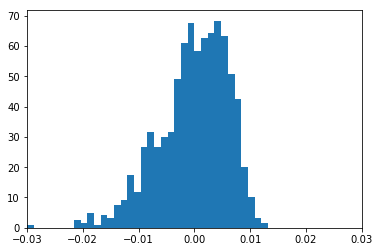

In [117]:
f,a = plt.subplots()
a.hist(m_distr, bins=50, normed=True, range=(-0.03,0.03))
a.set_xlim(-0.03, 0.03)

In [118]:
def generate_balance_stream(original_balance, skewness_parameter, nsamples=1000):
    balance = original_balance
    balance_stream = [balance]
    for i in range(nsamples):
        balance = balance * (1.0 + generate_multiplier(skewness_parameter))
        balance_stream.append(balance)
    return balance_stream

In [119]:
balance_streams = [generate_balance_stream(1000.0, skewness_parameter) for i in range(10)]

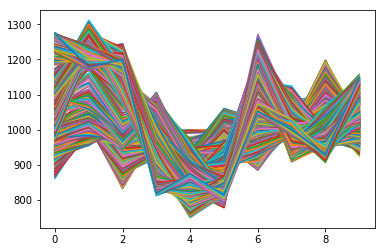

In [120]:
f,a = plt.subplots()
a.plot(balance_streams);